In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier

In [93]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [94]:
df = pd.read_csv('/content/email.csv')

In [95]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
df.isnull().sum()

,0
Category,0
Message,0


In [97]:
df.dropna(inplace=True)

In [98]:
df.duplicated().sum()

np.int64(415)

In [99]:
df.drop_duplicates(inplace=True)

In [100]:
df.rename(columns={'Category':'label','Message':'text'},inplace=True)

In [101]:
df.shape

(5158, 2)

In [102]:
from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()
df['label'] = encoding.fit_transform(df['label'])

#***EDA***

In [103]:
df['label'].value_counts()

,count
label,
0,4516
1,641
2,1


([<matplotlib.patches.Wedge at 0x7bfad8657ad0>,
 [Text(-1.0169711776785046, 0.4192488804650475, '0'),
  Text(1.0167157363926307, -0.41986796897547557, '1'),
  Text(1.099999796185438, -0.0006696207846548073, '2')],
 [Text(-0.5547115514610025, 0.22868120752638949, '87.55'),
  Text(0.5545722198505257, -0.22901889216844118, '12.43'),
  Text(0.5999998888284206, -0.00036524770072080394, '0.02')])

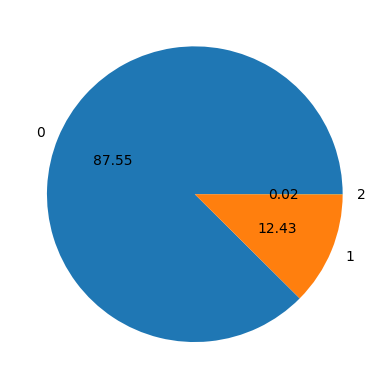

In [104]:
plt.pie(df['label'].value_counts(),labels=df['label'].value_counts().index,autopct = "%0.2f")

In [105]:
df['num_character'] = df['text'].apply(len)

In [106]:
df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [107]:
df['num_setences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [108]:
df.head()

,label,text,num_character,num_word,num_setences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5158 entries, 0 to 5572
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label          5158 non-null   int64 
 1   text           5158 non-null   object
 2   num_character  5158 non-null   int64 
 3   num_word       5158 non-null   int64 
 4   num_setences   5158 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 241.8+ KB


In [110]:
df.describe()

,label,num_character,num_word,num_setences
count,5158.000000,5158.000000,5158.000000,5158.000000
mean,0.124661,79.091508,18.557580,1.969562
std,0.330952,58.384085,13.406203,1.455448
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,2.000000,910.000000,220.000000,38.000000


In [111]:
df[df['label']==0][['num_character','num_word','num_setences']].describe()

,num_character,num_word,num_setences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [112]:
df[df['label']==1][['num_character','num_word','num_setences']].describe()

,num_character,num_word,num_setences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: >

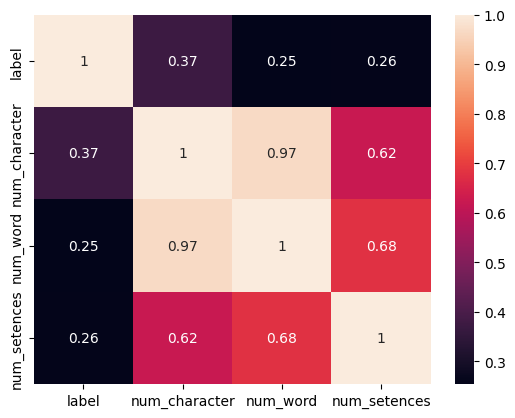

In [113]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(),annot=True)

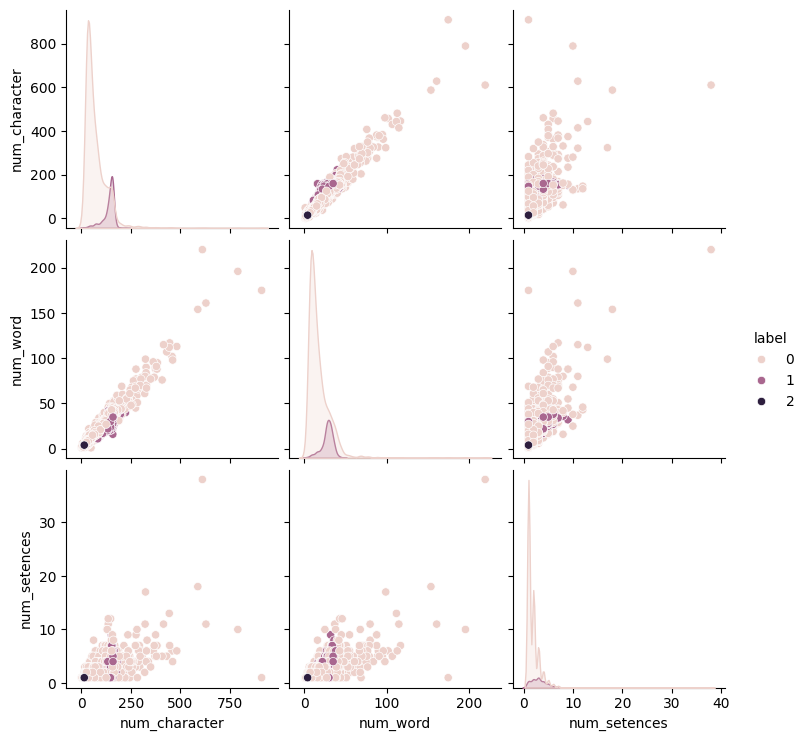

In [114]:
sns.pairplot(df,hue='label')

## ***Data Preprocessing***

In [115]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [116]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [117]:
import string

In [118]:
def transformed_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  text = y[:]
  y.clear()

  return " ".join(text)



In [119]:
transformed_text('Hi My Name Is Vinay loved %% eg')

'hi name vinay love eg'

In [120]:
df['transformed_text'] = df['text'].apply(transformed_text)

In [121]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [122]:
spam_wc = wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))

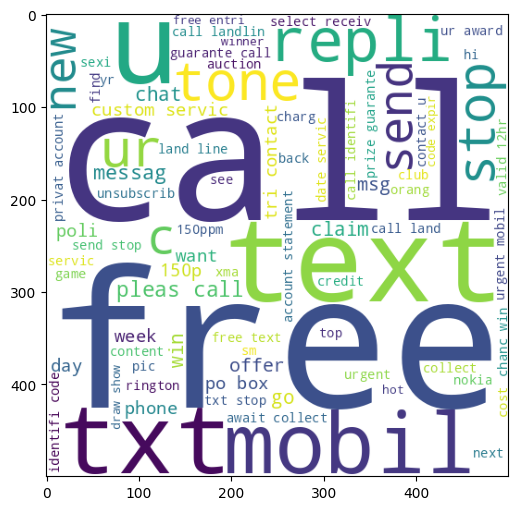

In [123]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [124]:
ham_wc = wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))

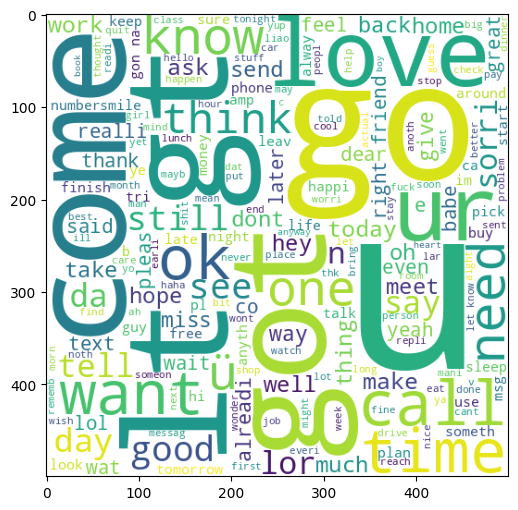

In [125]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [126]:
spam_corpus = []
for mess in df[df['label']==1]['transformed_text'].tolist():
  print(mess)
  for words in mess.split():
    spam_corpus.append(words)



free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

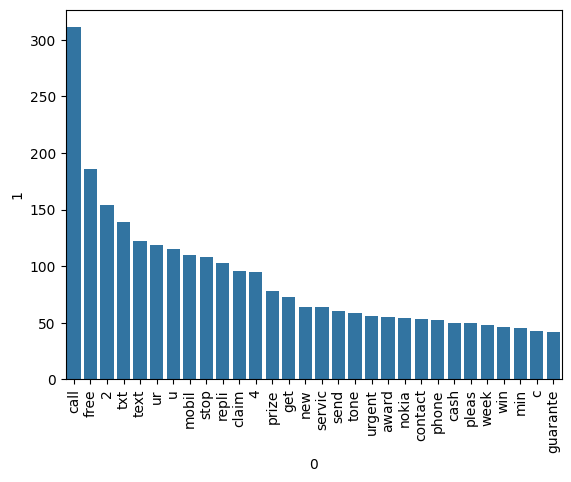

In [127]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [128]:
from collections import Counter


In [129]:
ham_corpus = []
for mess in df[df['label']==0]['transformed_text'].tolist():
  print(mess)
  for words in mess.split():
    ham_corpus.append(words)


go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
u dun say earli hor u c alreadi say
nah think goe usf live around though
even brother like speak treat like aid patent
per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun
gon na home soon want talk stuff anymor tonight k cri enough today
search right word thank breather promis wont take help grant fulfil promis wonder bless time
date sunday
oh k watch
eh u rememb 2 spell name ye v naughti make v wet
fine way u feel way gota b
serious spell name
go tri 2 month ha ha joke
ü pay first lar da stock comin
aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi
ffffffffff alright way meet sooner
forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol
lol alway convinc
catch bu fri egg make tea eat mom left dinner feel love
back amp pack car let know room
ahhh work vagu rememb feel like lol
wait still clear sure

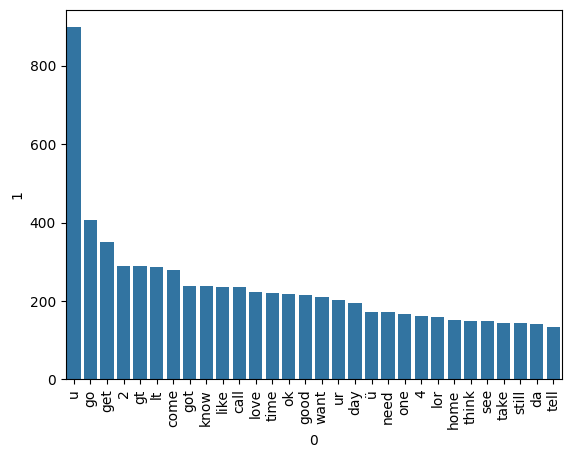

In [130]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# ***##Model Building***

In [131]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tidf = TfidfVectorizer(max_features=3000)
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [173]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [133]:

y = df['label'].values

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [170]:
gnb = GaussianNB()
mlb = MultinomialNB()
bnb = BernoulliNB()

#making the different naive Bayes model for checking in which model the accuracy and precision_score is best

In [136]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.873062015503876
[[800 119]
 [ 12 101]]
0.4590909090909091


In [165]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9728682170542635
[[913   6]
 [ 22  91]]
0.9381443298969072


# using tfidf over CountVectorizer,TfidfVectorizer for checking is model performe better or not


In [139]:
tidf = TfidfVectorizer(max_features=3000)

In [140]:
X_ = tidf.fit_transform(df['transformed_text']).toarray()

In [141]:
X_train_,X_test_,y_train_,y_test_=train_test_split(X_,y,test_size=0.2,random_state=2)

In [142]:
gnb.fit(X_train_,y_train_)
y_pred1_ = gnb.predict(X_test_)
print(accuracy_score(y_test_,y_pred1_))
print(confusion_matrix(y_test_,y_pred1_))
print(precision_score(y_test_,y_pred1_,average='macro'))

0.8701550387596899
[[800 114   5]
 [ 14  98   1]
 [  0   0   0]]
0.4816883779147931


In [171]:
#best model_performing
mlb.fit(X_train_,y_train_)
y_pred2_ = mlb.predict(X_test_)
print(accuracy_score(y_test_,y_pred2_))
print(confusion_matrix(y_test_,y_pred2_))
print(precision_score(y_test_,y_pred2_))

0.9796511627906976
[[919   0]
 [ 21  92]]
1.0


In [144]:
bnb.fit(X_train_,y_train_)
y_pred3_ = bnb.predict(X_test_)
print(accuracy_score(y_test_,y_pred3_))
print(confusion_matrix(y_test_,y_pred3_))
print(precision_score(y_test_,y_pred3_))

0.9835271317829457
[[916   3]
 [ 14  99]]
0.9705882352941176


In [145]:
##here we can clearly see the precision score are increase in MultinomialNB and also increas in accuracy for now this model the best model

In [146]:
#checking the other model

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

In [158]:
lG = LogisticRegression(solver='liblinear',penalty='l1' )
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=150,random_state=2)
knn = KNeighborsClassifier()
svm = SVC(kernel='sigmoid',gamma= 0.1 )
nb = MultinomialNB()
ad = AdaBoostClassifier(n_estimators=60,random_state=2)
gb = GradientBoostingClassifier(n_estimators=50,random_state=2)
ex = ExtraTreesClassifier(n_estimators=60,random_state=2)


In [159]:
clf = {'lg':lG,'dt':dt,'rf':rf,'knn':knn,'svm':svm,'nb':nb,'ad':ad,'gb':gb,'ex':ex}
type(clf)

dict

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

def model_train(clf, X_train_, y_train_, X_test_, y_test_):
    clf.fit(X_train_, y_train_)
    y_pred = clf.predict(X_test_)

    accuracy = accuracy_score(y_test_, y_pred)
    precision = precision_score(y_test_, y_pred)  # Specify for multiclass

    return accuracy, precision

# Ensure `lG` (classifier) is defined properly before calling model_train


In [156]:
model_train(lG, X_train, y_train, X_test, y_test)


(0.9728682170542635, 0.967032967032967)

In [161]:
accuracy_scores = []
precision_scores = []

for name, Clf in clf.items():
    current_accuracy,current_precision = model_train(Clf, X_train_, y_train_, X_test_, y_test_)

    print(f"For {name}:")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
model = pd.DataFrame({'Accuracy':accuracy_scores,'Precision':precision_scores},index=clf.keys())

For lg:
Accuracy - 0.9583333333333334
Precision - 0.9375
For dt:
Accuracy - 0.9534883720930233
Precision - 0.8037383177570093
For rf:
Accuracy - 0.9767441860465116
Precision - 1.0
For knn:
Accuracy - 0.9234496124031008
Precision - 1.0
For svm:
Accuracy - 0.9418604651162791
Precision - 0.9818181818181818
For nb:
Accuracy - 0.9796511627906976
Precision - 1.0
For ad:
Accuracy - 0.9331395348837209
Precision - 0.8548387096774194


KeyboardInterrupt: 

In [ ]:
vc = VotingClassifier(estimators=[('rf',rf),('knn',knn),('ex',ex),])

In [ ]:
vc.fit(X_train_,y_train_)

In [ ]:
y_pred_ = vc.predict(X_test_)
print(accuracy_score(y_test_,y_pred_))
print(confusion_matrix(y_test_,y_pred_))
print(precision_score(y_test_,y_pred_))


In [172]:
import pickle

In [174]:
pickle.dump(tidf,open('vectorizer.pkl','wb'))
pickle.dump(mlb,open('model.pkl','wb'))

In [182]:
d = df[df['label']==1]['text']
d.iloc[0]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"